# Project - EDA with Pandas Using the Ames Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains housing values in the suburbs of Ames.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file ``ames_train.csv``) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

In [110]:
# Let's get started importing the necessary libraries
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.available


['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [89]:
# Loading the data

df = pd.read_csv('ames_train.csv')
df1 = (df['YearBuilt'].sub(2020))*-1
df1

0        17
1        44
2        19
3       105
4        20
       ... 
1455     21
1456     42
1457     79
1458     70
1459     55
Name: YearBuilt, Length: 1460, dtype: int64

In [11]:
# Investigate the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

<IPython.core.display.Javascript object>


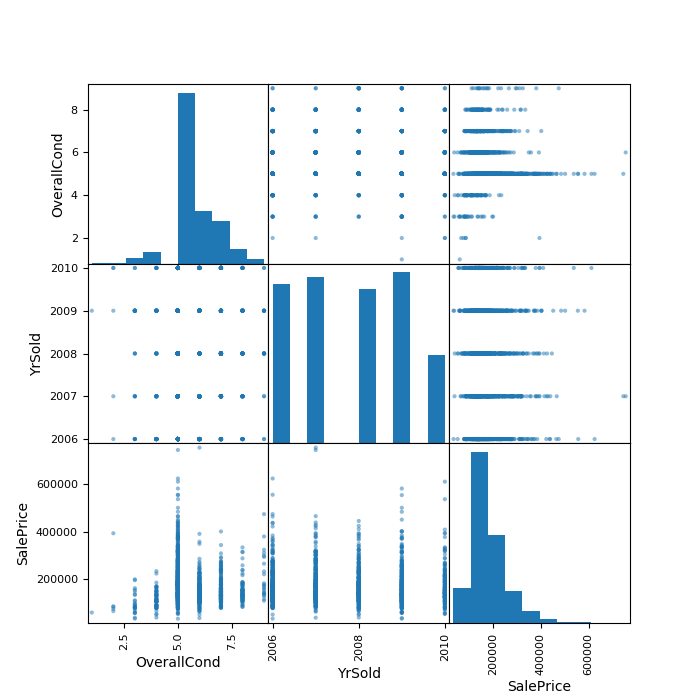

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002585D8EE550>,
      dtype=object)

In [66]:
# Investigating Distributions using scatter_matrix
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
names = ['MSZoning', 'OverallCond', 'KitchenQual', 'YrSold', 'SalePrice']
df1 = df[['MSZoning', 'OverallCond', 'KitchenQual', 'YrSold', 'SalePrice']]
pd.plotting.scatter_matrix(df1, figsize=[7,7])

<IPython.core.display.Javascript object>


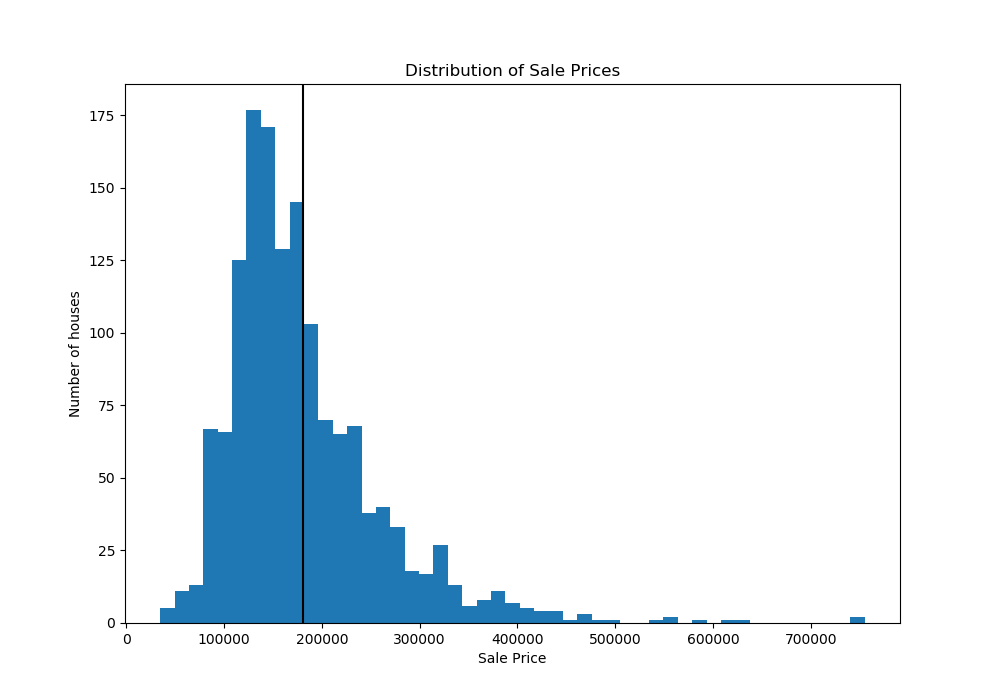

In [67]:
# Create a plot that shows the SalesPrice Distribution
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df['SalePrice'], bins='auto')
ax.set_title('Distribution of Sale Prices')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Number of houses')
ax.axvline(df['SalePrice'].mean(), color='black');

<IPython.core.display.Javascript object>


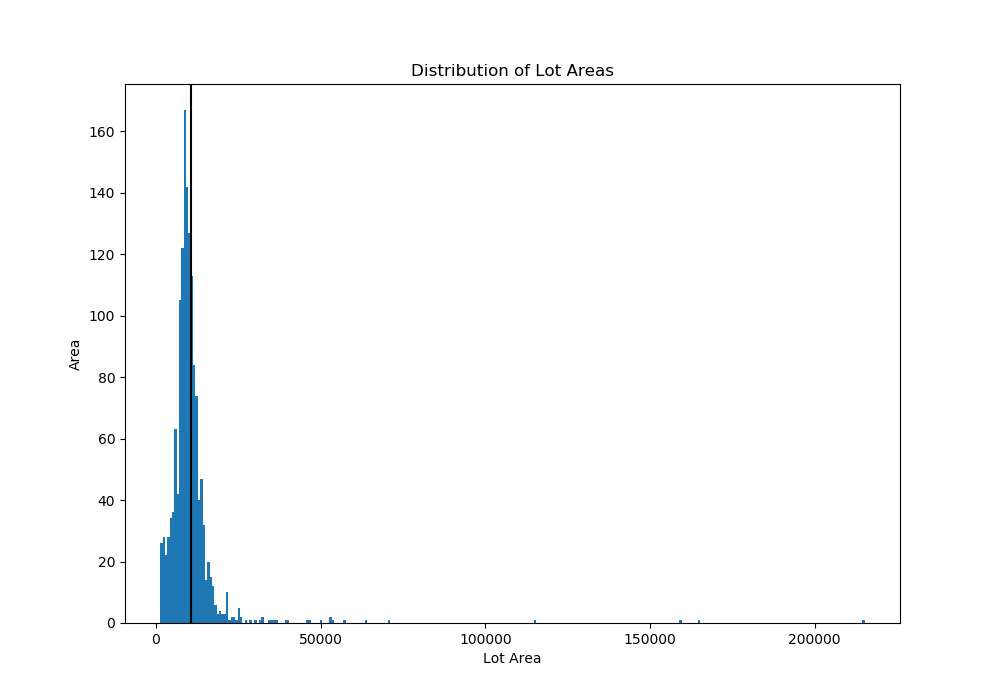

In [69]:
# Create a plot that shows the LotArea Distribution
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df['LotArea'], bins='auto')
ax.set_title('Distribution of Lot Areas')
ax.set_xlabel('Lot Area')
ax.set_ylabel('Area')
ax.axvline(df['LotArea'].mean(), color='black');

<IPython.core.display.Javascript object>


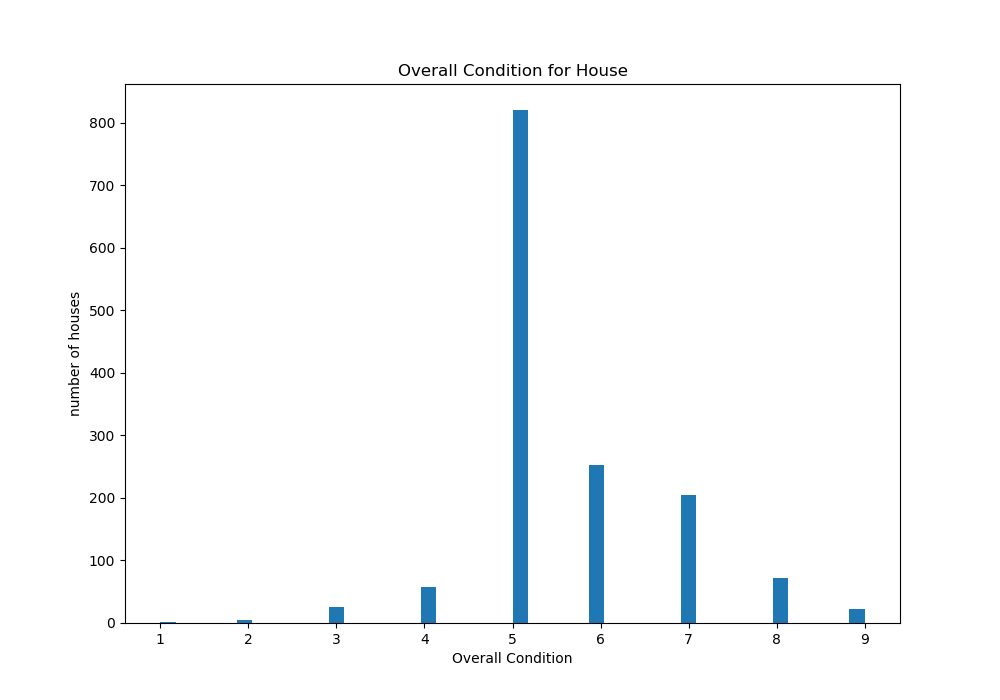

Text(0.5, 1.0, 'Overall Condition for House')

In [79]:
# Create a plot that shows the Distribution of the overall house condition 'OverallCond'

fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df['OverallCond'], bins='auto')
ax.set_xlabel('Overall Condition')
ax.set_ylabel('number of houses')
ax.set_title('Overall Condition for House')


<IPython.core.display.Javascript object>


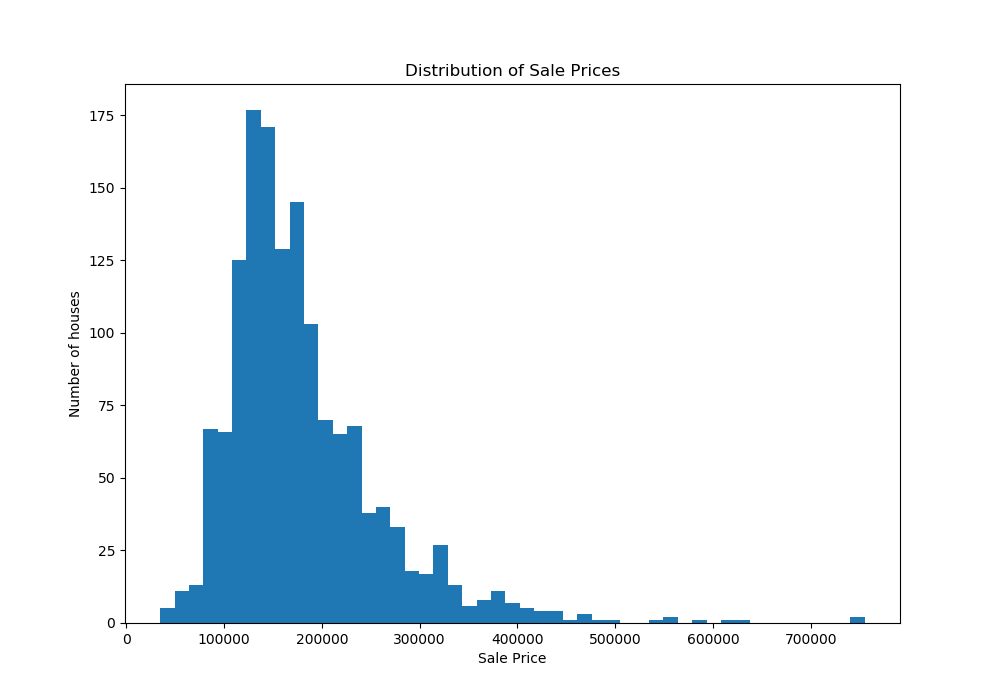

Text(0, 0.5, 'Number of houses')

In [99]:
# Create a Box Plot for SalePrice
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df['SalePrice'], bins='auto')
ax.set_title('Distribution of Sale Prices')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Number of houses')
# ax.axvline(df['SalePrice'].mean(), color='black');


<IPython.core.display.Javascript object>


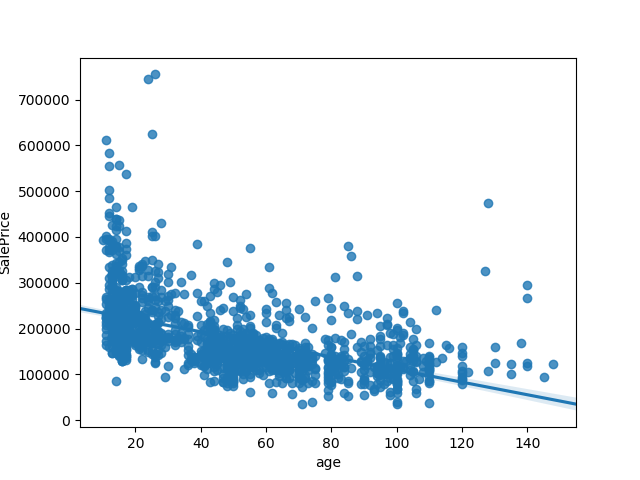

In [112]:
# Perform an Exploration of home values by age

df['age'] = (df['YearBuilt'].sub(2020))*-1
df['age']
# df.info()


# home_values = ['OverallCond', 'ExterQual', 'SaleCondition', 'LotArea']
# fig, ax = plt.subplots(figsize=(10, 7))
# plt.bar((df['age']),(df['SalePrice']))
# ax.set_title('Distribution of age')
# ax.set_xlabel('age')
# ax.set_ylabel('price')


sns.regplot((df['age']),(df['SalePrice']))

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!